### Crreating the data frame


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df=pd.read_csv(r'D:\iiitnr\Day17\voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Checking nullvalues

In [28]:
df.isnull().sum()

label            0
label_encoded    0
dtype: int64

# Check rows and columns

In [99]:
df.shape

(3168, 22)

# Label encoding

In [102]:

from sklearn.preprocessing import LabelEncoder
lebel = LabelEncoder()
df['label_encoded'] = lebel.fit_transform(df['label'])

X = df[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
        'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
        'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']]
y = df['label_encoded']


In [104]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [103]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label_encoded, dtype: int64

# Train test split

In [75]:
from sklearn.model_selection import train_test_split

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1.> logistic regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [80]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\ANKIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
y_pred = model.predict(X_test)

In [82]:
y_pred.shape

(634,)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score

In [105]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))

Accuracy: 0.831230283911672
classification_report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       297
           1       0.85      0.82      0.84       337

    accuracy                           0.83       634
   macro avg       0.83      0.83      0.83       634
weighted avg       0.83      0.83      0.83       634



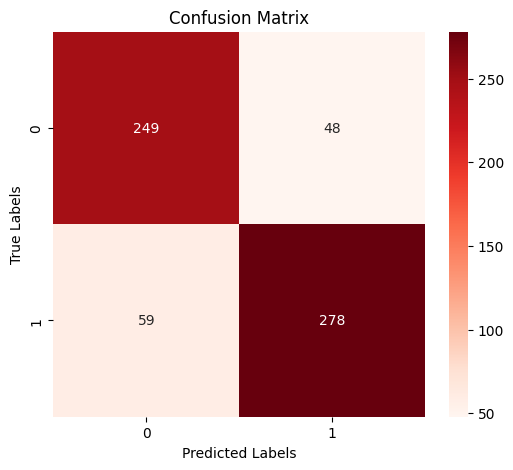

In [73]:


cm = confusion_matrix(y_test, y_pred)
class_names = sorted(list(set(y_test)))  

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# KNN classifier

In [112]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print(" KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

 KNN Results:
Accuracy: 0.7050473186119873
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       297
           1       0.73      0.71      0.72       337

    accuracy                           0.71       634
   macro avg       0.70      0.70      0.70       634
weighted avg       0.71      0.71      0.71       634

Confusion Matrix:
 [[208  89]
 [ 98 239]]


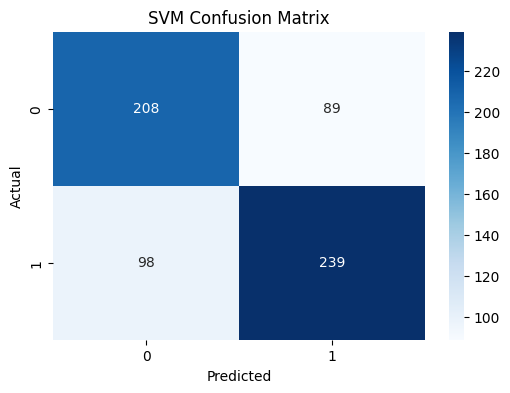

In [97]:

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# SVM classifier

In [98]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(" SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

 SVM Results:
Accuracy: 0.9416403785488959
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.89      0.93       297
           1       0.91      0.99      0.95       337

    accuracy                           0.94       634
   macro avg       0.95      0.94      0.94       634
weighted avg       0.94      0.94      0.94       634

Confusion Matrix:
 [[265  32]
 [  5 332]]


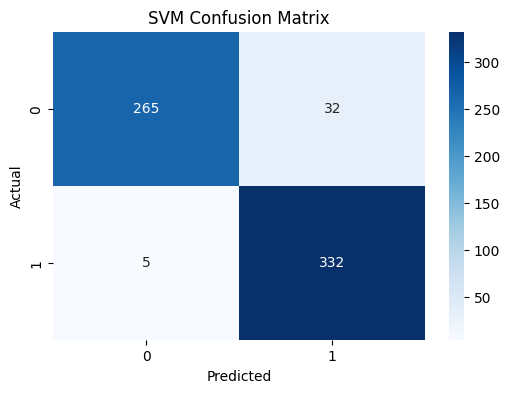

In [95]:

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
